In [337]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score

# Model Definition with softmax in the output layer
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_unit, output_dim):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dim, hidden_unit),
            nn.ReLU(),
            nn.Linear(hidden_unit, hidden_unit),
            nn.ReLU(),
            nn.Linear(hidden_unit, output_dim),
            nn.Softmax(dim=1)  # Softmax for multi-class classification
        )

    def forward(self, input_img_tensor):
        return self.layer(input_img_tensor)

# Load MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize Model, Loss Function, and Optimizer
model = SimpleNN(input_dim=28*28, hidden_unit=128, output_dim=10)  # 28x28 for MNIST, 10 classes
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
print("[+] Training Start")

for i in range(epochs):
    train_loss = 0
    test_loss = 0
    train_accuracy = 0
    test_accuracy = 0
    total_train_samples = 0
    total_correct_train = 0

    # Training Phase
    model.train()
    for data, target in train_loader:
        y_pred = model(data)
        loss = loss_fn(y_pred, target)
        train_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(y_pred, 1)
        total_train_samples += target.size(0)
        total_correct_train += (predicted == target).sum().item()

        loss.backward()
        optimizer.zero_grad()
        optimizer.step()

    # Calculate training accuracy
    train_accuracy = total_correct_train / total_train_samples * 100

    # Testing Phase
    model.eval()
    with torch.inference_mode():
        for data, target in test_loader:
            y_pred = model(data)
            loss = loss_fn(y_pred, target)
            test_loss += loss.item()

            # Calculate test accuracy
            _, predicted = torch.max(y_pred, 1)
            test_accuracy += (predicted == target).sum().item()

    # Calculate test accuracy
    total_test_samples = len(test_loader.dataset)
    test_accuracy = test_accuracy / total_test_samples * 100

    # Print the results for this epoch
    avg_train_loss = train_loss / len(train_loader)
    avg_test_loss = test_loss / len(test_loader)

    print(f"{i+1}/{epochs} Train Loss: {avg_train_loss:.4f} Train Acc: {train_accuracy:.2f}%")
    print(f"{i+1}/{epochs} Test Loss: {avg_test_loss:.4f} Test Acc: {test_accuracy:.2f}%")


[+] Training Start
1/10 Train Loss: 2.3028 Train Acc: 9.57%
1/10 Test Loss: 2.3027 Test Acc: 9.10%
2/10 Train Loss: 2.3028 Train Acc: 9.57%
2/10 Test Loss: 2.3027 Test Acc: 9.10%
3/10 Train Loss: 2.3028 Train Acc: 9.57%
3/10 Test Loss: 2.3027 Test Acc: 9.10%
4/10 Train Loss: 2.3028 Train Acc: 9.57%
4/10 Test Loss: 2.3027 Test Acc: 9.10%
5/10 Train Loss: 2.3028 Train Acc: 9.57%
5/10 Test Loss: 2.3027 Test Acc: 9.10%
6/10 Train Loss: 2.3028 Train Acc: 9.57%
6/10 Test Loss: 2.3027 Test Acc: 9.10%
7/10 Train Loss: 2.3028 Train Acc: 9.57%
7/10 Test Loss: 2.3027 Test Acc: 9.10%
8/10 Train Loss: 2.3028 Train Acc: 9.57%
8/10 Test Loss: 2.3027 Test Acc: 9.10%
9/10 Train Loss: 2.3028 Train Acc: 9.57%
9/10 Test Loss: 2.3027 Test Acc: 9.10%
10/10 Train Loss: 2.3028 Train Acc: 9.57%
10/10 Test Loss: 2.3027 Test Acc: 9.10%


In [338]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)

        # Get the predicted labels
        _, predicted = torch.max(output, 1)

        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = correct / total * 100
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 9.10%


torch.Size([1, 28, 28])
tensor(7)


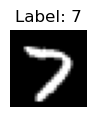

In [339]:
import matplotlib.pyplot as plt
for batch_img, batch_label in train_loader:
    img = batch_img[0]
    label = batch_label[0]
    print(img.shape)
    print(label)
    image = img.numpy().squeeze()  # Remove the channel dimension for grayscale image

    # Plot the image
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()
    break